In [1]:
import pandas as pd
import numpy as np
from mido import MidiFile
# import pygame
import IPython
import matplotlib.pyplot as plt
import librosa.display
import librosa
import note_seq
# import magenta

# import mt3

In [ ]:
MAESTRO_PATH = "../data/raw/maestro-v3.0.0/"

In [3]:
data = pd.read_csv("../data/raw/musicnet_metadata.csv")
musicnet = pd.read_csv("../data/raw/musicnet_metadata.csv")

In [5]:
data.head()

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546


In [6]:
musicnet

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546
...,...,...,...,...,...,...,...,...,...
325,2632,Beethoven,Piano Sonata No 10 in G major,2. Andante,Solo Piano,Paul Pitman,piano-midi.de,OP14NO2,341
326,2633,Beethoven,Piano Sonata No 10 in G major,3. Scherzo: Allegro assai,Solo Piano,Paul Pitman,piano-midi.de,OP14NO2,227
327,2659,Bach,Violin Partita No 1 in B minor,6. Double,Solo Violin,John Garner,suzumidi,BWV1002,108
328,2677,Beethoven,Piano Sonata No 9 in E major,1. Allegro,Solo Piano,Paul Pitman,piano-midi.de,OP14NO1,445


In [7]:
track_data = pd.read_csv("../data/raw/musicnet/musicnet/train_labels/2632.csv")
track_data

,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,111582,120286,1,55,0.75,0.239583,Sixteenth
1,120798,135134,1,55,1.00,0.489583,Eighth
2,120798,135134,1,52,1.00,0.489583,Eighth
3,120798,135134,1,60,1.00,0.489583,Eighth
4,120798,135134,1,48,1.00,0.489583,Eighth
...,...,...,...,...,...,...,...
2052,14860254,14968798,1,72,501.00,1.989583,Half
2053,14860254,14968798,1,48,501.00,1.989583,Half
2054,14860254,14968798,1,43,501.00,1.989583,Half
2055,14860254,14968798,1,36,501.00,1.989583,Half


In [8]:
data.composer.value_counts()

Beethoven    157
Bach          67
Schubert      30
Mozart        24
Brahms        24
Cambini        9
Dvorak         8
Faure          4
Ravel          4
Haydn          3
Name: composer, dtype: int64

In [9]:
midi = MidiFile("../data/raw/musicnet_midis/musicnet_midis/Mozart/1788_kv_465_1.mid")
midi

<midi file '../data/raw/musicnet_midis/musicnet_midis/Mozart/1788_kv_465_1.mid' type 1, 5 tracks, 10117 messages>

In [14]:
y, sr = librosa.load("../data/raw/musicnet/musicnet/train_data/1727.wav", sr=None)

In [16]:
print(y.shape)
print(sr)

(19715328,)
44100


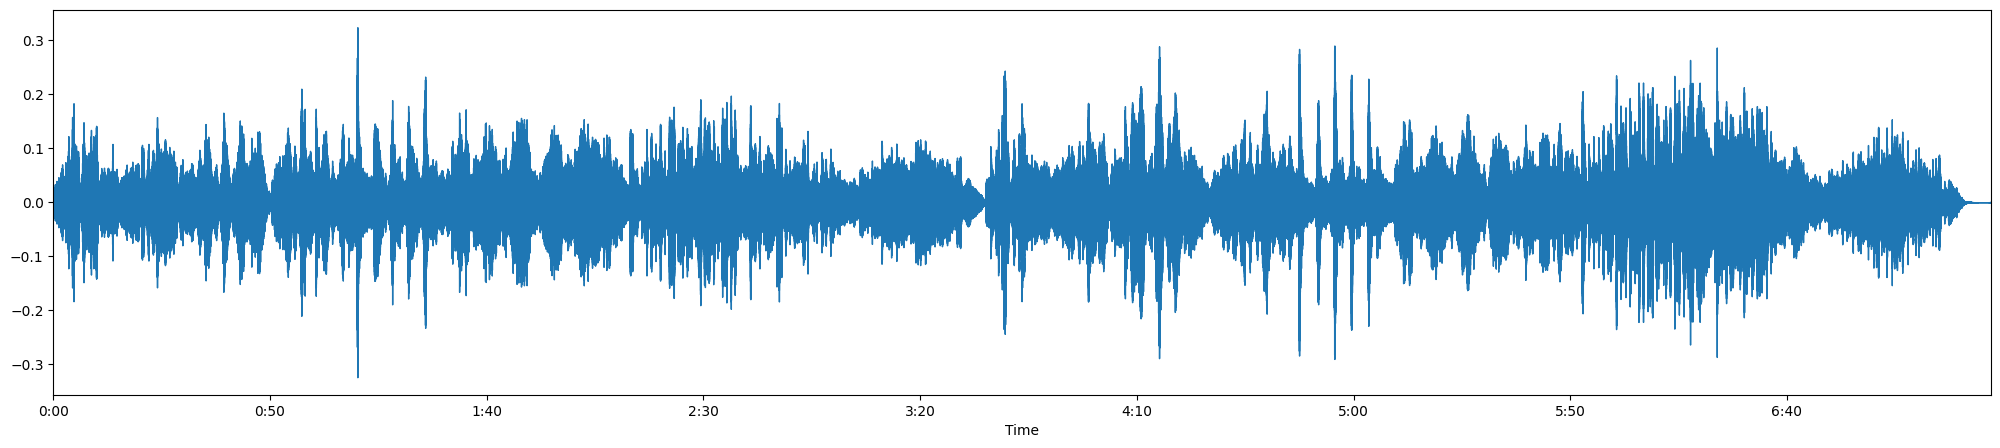

In [17]:
plt.figure(figsize=(25, 5))
librosa.display.waveplot(y, sr=sr)

<AxesSubplot:xlabel='Time', ylabel='Hz'>

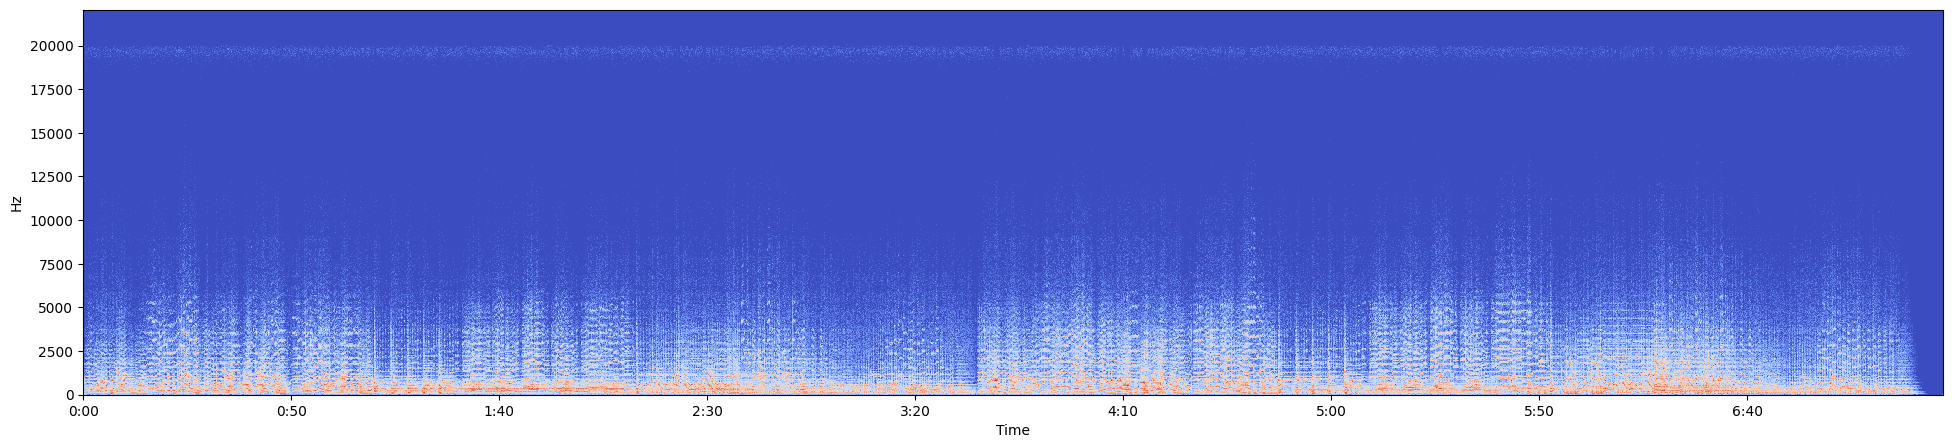

In [18]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(24, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [3]:
maestro_ds = pd.read_csv("../data/raw/maestro-v3.0.0/maestro-v3.0.0.csv")

In [4]:
maestro_ds

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508
...,...,...,...,...,...,...,...
1271,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",test,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,241.470442
1272,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",train,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,114.696243
1273,Wolfgang Amadeus Mozart,"Sonata in F Major, K533",validation,2004,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,1139.198478
1274,Wolfgang Amadeus Mozart,"Sonata in F Major, K533/K494",validation,2018,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,1068.751602


In [5]:
maestro_ds["audio_filename"][0]

'2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R3_2018_wav--1.wav'

In [6]:
y, sr = librosa.load(MAESTRO_PATH + maestro_ds["audio_filename"][0], sr=44100)

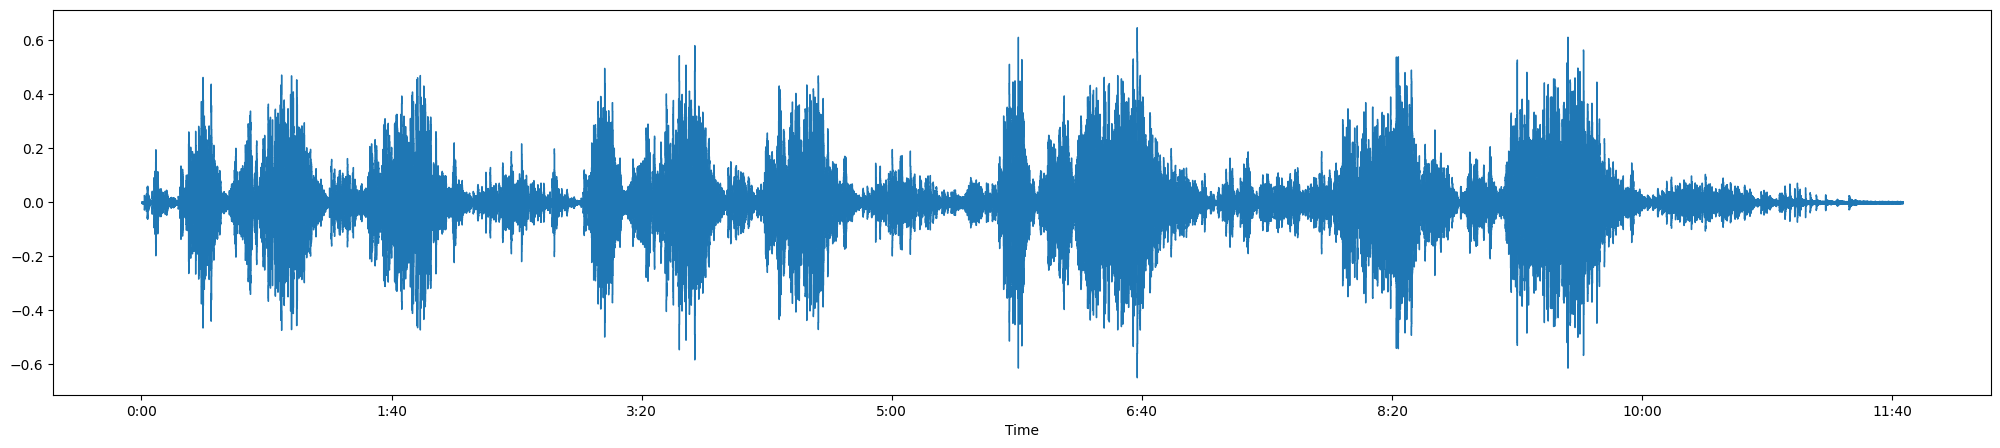

In [7]:
plt.figure(figsize=(25, 5))
librosa.display.waveshow(y, sr=sr)

In [68]:
from scipy.signal import windows

/tmp/ipykernel_257/60035166.py:2: FutureWarning: Pass y=[ 0.00016957  0.00022646  0.00029841 ... -0.0019912  -0.00237682
  0.        ], sr=44100 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectrogram = librosa.feature.melspectrogram(y, sr, n_mels=128, fmin=8, fmax=12500, n_fft=1000, hop_length=1000 // 1, window="taylor")


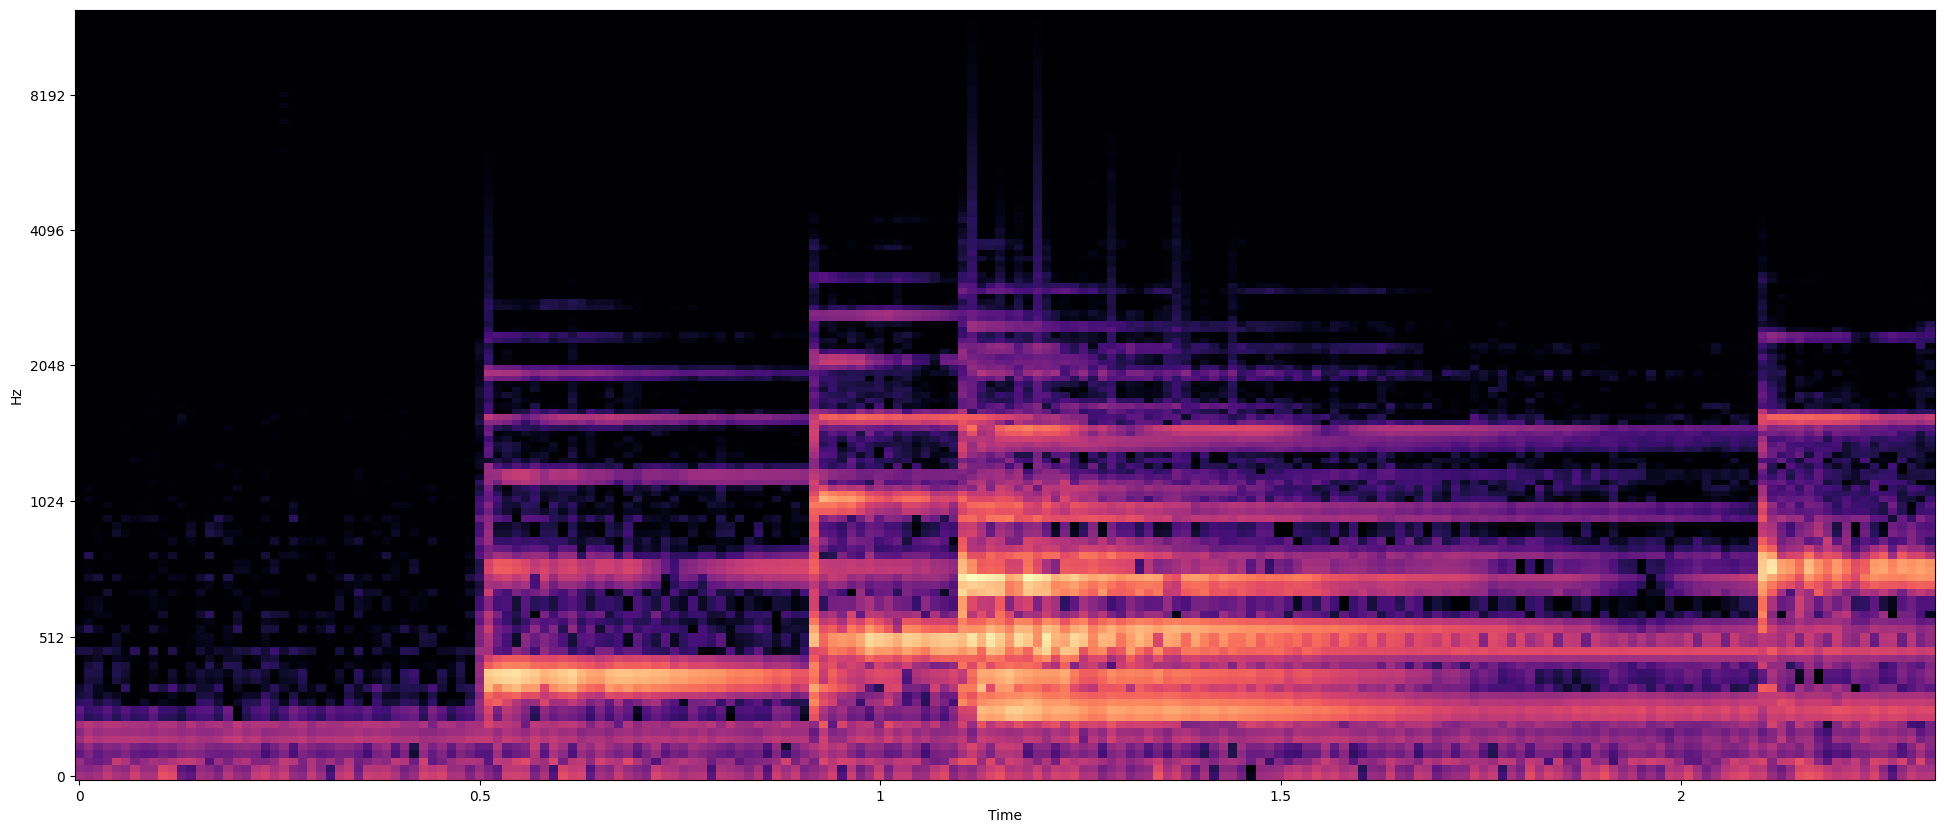

In [78]:
window = windows.kaiser(1000, 3)
spectrogram = librosa.feature.melspectrogram(y, sr, n_mels=128, fmin=8, fmax=12500, n_fft=1000, hop_length=1000 // 1, window="taylor")
s_db = librosa.power_to_db(spectrogram)

fig, ax = plt.subplots()
fig.set_size_inches(24, 10)
librosa.display.specshow(s_db[:, :200], sr=sr, x_axis='time',y_axis='mel', fmax=12500)

In [79]:
type(s_db)

numpy.ndarray

In [10]:
# from ddsp import spectral_ops
import tensorflow as tf

In [11]:
len(y), s_db.shape

(33805197, (128, 66026))

<AxesSubplot:>

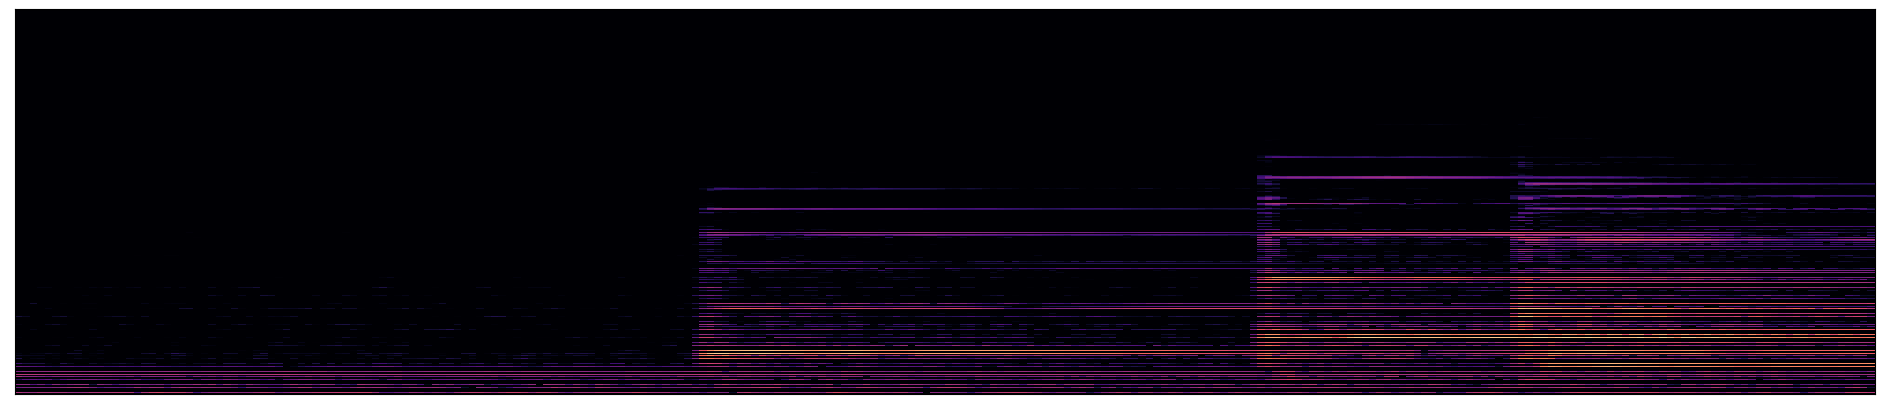

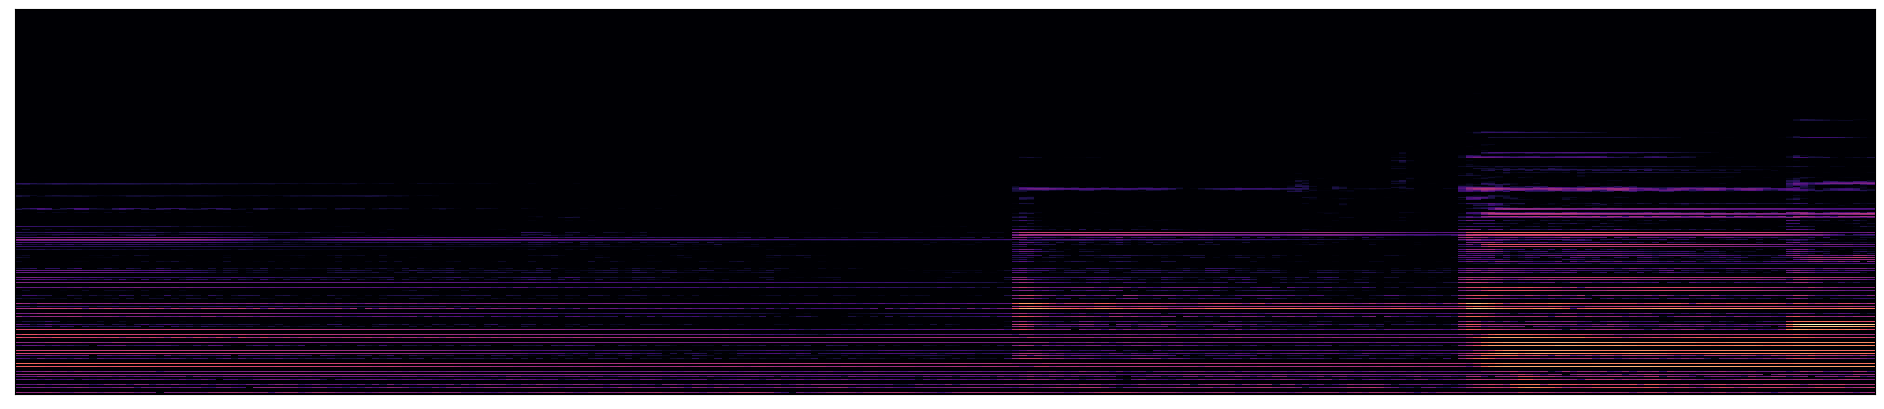

In [66]:
frames = tf.signal.frame(
    signal=s_db[:, :500],
    frame_length=250,
    frame_step=250,
)
frames = frames.numpy()

plt.figure(figsize=(24, 5))
librosa.display.specshow(frames[:, 0, :], sr=sr, )
plt.figure(figsize=(24, 5))
librosa.display.specshow(frames[:, 1, :], sr=sr)

<AxesSubplot:>

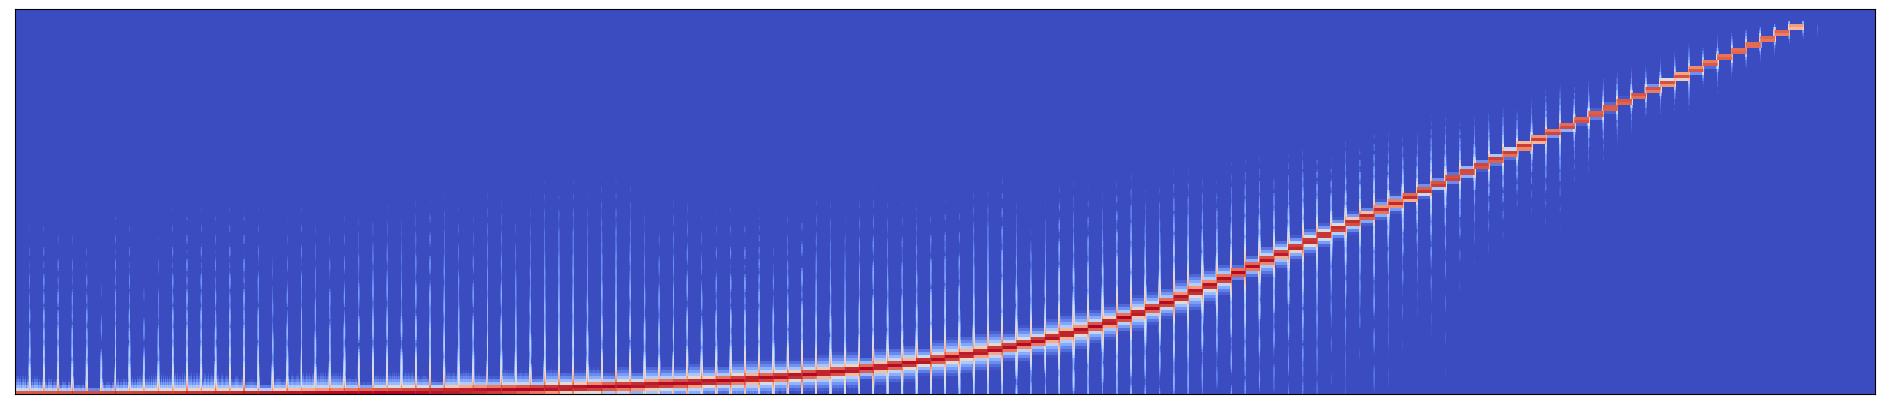

In [25]:
y, sr = librosa.load("../data/raw/MIDI all.wav")
spectrogram = librosa.feature.melspectrogram(y, sr, n_mels=128, fmin=8, fmax=12500)

s_db = librosa.power_to_db(spectrogram)
plt.figure(figsize=(24, 5))
librosa.display.specshow(s_db, sr=sr)

<AxesSubplot:>

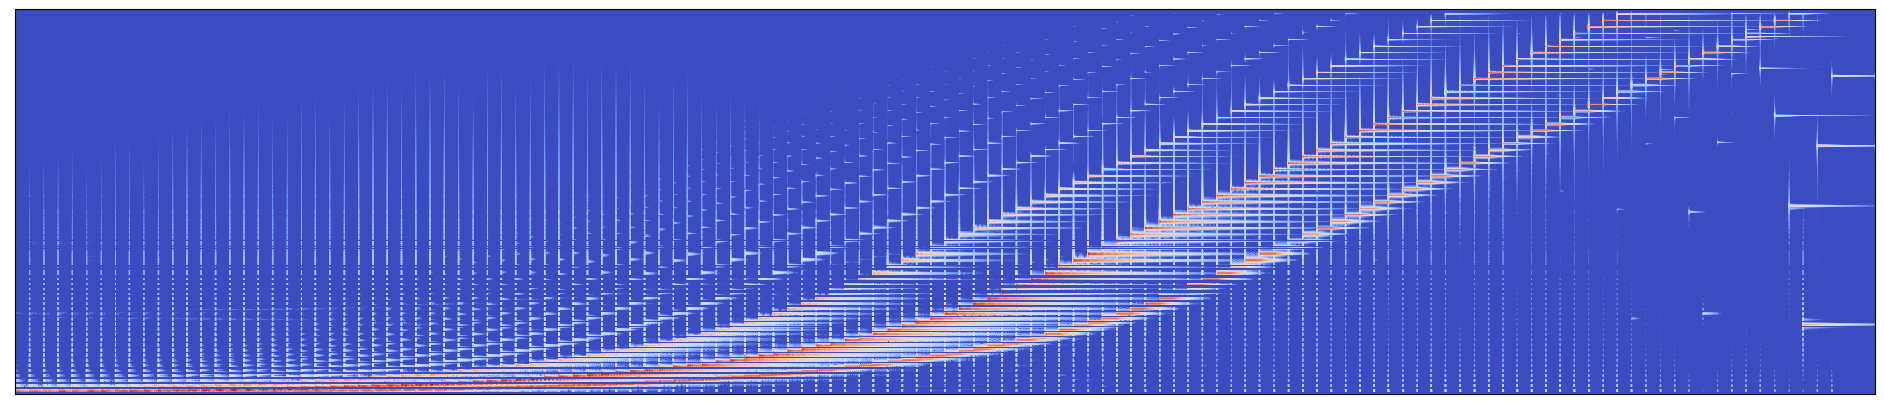

In [26]:
y, sr = librosa.load("../data/raw/MIDI all synth.wav")
spectrogram = librosa.feature.melspectrogram(y, sr, n_mels=1000)

s_db = librosa.power_to_db(spectrogram)
plt.figure(figsize=(24, 5))
librosa.display.specshow(s_db, sr=sr)